In [1]:
# Multinomial-Logistic-Regression

import seaborn  as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
df = sns.load_dataset('iris')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
encoder = LabelEncoder()
df['species'] = encoder.fit_transform(df['species'])

In [5]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [6]:
df = df[['sepal_length','petal_length','species']]

In [7]:
df

,sepal_length,petal_length,species
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0
...,...,...,...
145,6.7,5.2,2
146,6.3,5.0,2
147,6.5,5.2,2
148,6.2,5.4,2


In [8]:
x = df.iloc[:,0:2]
y = df['species']

In [9]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [10]:
clf = LogisticRegression(multi_class='multinomial')

clf.fit(x_train,y_train)

LogisticRegression(multi_class='multinomial')

In [11]:
y_pred = clf.predict(x_test)

In [12]:
print(accuracy_score(y_test,y_pred))

0.9666666666666667


In [13]:
pd.DataFrame(confusion_matrix(y_test,y_pred))

,0,1,2
0,14,0,0
1,0,7,1
2,0,0,8


In [14]:
# prediction
query = np.array([[3.4,2.7]])
clf.predict_proba(query)

# we recive 3 output that tells of probability in order satosa, vercical or verginaca

C:\Users\NIKUNJ KIKANI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[7.25957888e-01, 2.73627865e-01, 4.14246954e-04]])

In [15]:
clf.predict(query)

C:\Users\NIKUNJ KIKANI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

C:\Users\NIKUNJ KIKANI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


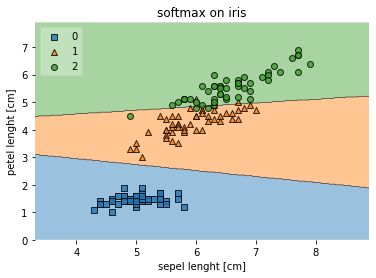

In [16]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(x.values , y.values , clf, legend=2)

# Adding axes annotations 
plt.xlabel('sepel lenght [cm]')
plt.ylabel('petel lenght [cm]')
plt.title('softmax on iris')

plt.show()


In [17]:
# The End .